## Predict Titanic Survival
The RMS Titanic set sail on its maiden voyage in 1912, crossing the Atlantic from Southampton, England to New York City. The ship never completed the voyage, sinking to the bottom of the Atlantic Ocean after hitting an iceberg, bringing down 1,502 of 2,224 passengers onboard.

In this project you will create a Logistic Regression model that predicts which passengers survived the sinking of the Titanic, based on features like age and class.

The data we will be using for training our model is provided by Kaggle. Feel free to make the model better on your own and submit it to the [Kaggle Titanic competition!](https://www.kaggle.com/c/titanic)

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
%matplotlib inline

### Load the Data

In [93]:
passengers = pd.read_csv('passengers.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [95]:
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Clean Data
<b>"women and children first"</b>

In [97]:
# update sex columns to numerical (female=1, male=0)
passengers['Sex'] = passengers['Sex'].map({'female':1, 'male':0})
passengers.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [98]:
passengers.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
# fill the nan values in age columns
passengers['Age'].fillna(inplace=True, value=round(passengers['Age'].mean()))

In [100]:
passengers.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
passengers['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [102]:
# create a first class column 1=1 (firstclass) and 0=other
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)
passengers.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1


In [103]:
# create a second class column 1=2 (second class) and 0=other
passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 2 else 0)
passengers.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S,0,0


### Select and Split the Data

In [104]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = passengers['Survived']

In [133]:
# perform train test and split
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    survival, 
    test_size=0.2,
    random_state = 1
)

In [134]:
X_train

,Sex,Age,FirstClass,SecondClass
301,0,30.0,0,0
309,1,30.0,1,0
516,1,34.0,0,1
120,0,21.0,0,1
570,0,62.0,0,1
...,...,...,...,...
715,0,19.0,0,0
767,1,30.5,0,0
72,0,21.0,0,1
235,1,30.0,0,0


In [135]:
X_test

,Sex,Age,FirstClass,SecondClass
862,1,48.0,1,0
223,0,30.0,0,0
84,1,17.0,0,1
680,1,30.0,0,0
535,1,7.0,0,1
...,...,...,...,...
796,1,49.0,1,0
815,0,30.0,1,0
629,0,30.0,0,0
421,0,21.0,0,0


In [136]:
y_train

301    1
309    1
516    1
120    0
570    1
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 712, dtype: int64

In [137]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

### Normalize the data

In [149]:
# scaler the feature data so it has mean=0 and standart deviation=1
scaler = StandardScaler()
X_train_features = scaler.fit_transform(X_train)
X_test_features = scaler.transform(X_test)

In [150]:
X_train_features

array([[-0.73334642, -0.01000261, -0.56870034, -0.51662744],
       [ 1.36361202, -0.01000261,  1.7583953 , -0.51662744],
       [ 1.36361202,  0.2917072 , -0.56870034,  1.93563082],
       ...,
       [-0.73334642, -0.68884969, -0.56870034,  1.93563082],
       [ 1.36361202, -0.01000261, -0.56870034, -0.51662744],
       [-0.73334642, -0.68884969, -0.56870034, -0.51662744]])

In [151]:
X_test_features

array([[ 1.36361202,  1.34769155,  1.7583953 , -0.51662744],
       [-0.73334642, -0.01000261, -0.56870034, -0.51662744],
       [ 1.36361202, -0.9905595 , -0.56870034,  1.93563082],
       [ 1.36361202, -0.01000261, -0.56870034, -0.51662744],
       [ 1.36361202, -1.74483404, -0.56870034,  1.93563082],
       [-0.73334642, -0.68884969, -0.56870034, -0.51662744],
       [-0.73334642,  0.48027583, -0.56870034,  1.93563082],
       [ 1.36361202,  0.36713465,  1.7583953 , -0.51662744],
       [-0.73334642, -0.16085752,  1.7583953 , -0.51662744],
       [ 1.36361202, -0.01000261, -0.56870034, -0.51662744],
       [-0.73334642, -0.38713988, -0.56870034, -0.51662744],
       [ 1.36361202, -0.31171243, -0.56870034, -0.51662744],
       [-0.73334642,  1.80025626,  1.7583953 , -0.51662744],
       [-0.73334642, -0.01000261, -0.56870034,  1.93563082],
       [ 1.36361202, -0.01000261, -0.56870034, -0.51662744],
       [-0.73334642, -0.16085752,  1.7583953 , -0.51662744],
       [-0.73334642, -1.

## Create and Evaluate the Model

In [152]:
# Create and train model
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [153]:
# score the model on train data
model.score(X_train_features, y_train)

0.797752808988764

The score of correct classifications, or the accuracy is 79%.

In [154]:
# score the model on test data
model.score(X_test_features, y_test)

0.8044692737430168

The model is perform pretty good, the resul is 80% (random_state = 1. when random_state is not defined, the model return 73%)

In [155]:
# feature coefficients determined by model
print(list(zip(['Sex', 'Age', 'FirstClass', 'SecondClass'], model.coef_[0])))

[('Sex', 1.250754825947456), ('Age', -0.4574609183871818), ('FirstClass', 1.0279337564210598), ('SecondClass', 0.5513094353122898)]


Sex features is the most important in predicting survival on the shinking of Titanic.

### Predicted the Model

Let’s use our model to make predictions on the survival of a few fateful passengers. Provided in the code editor is information for 3rd class passenger Jack and 1st class passenger Rose, stored in NumPy arrays. The arrays store 4 feature values, in the following order:
- Sex, represented by a 0 for male and 1 for female
- Age, represented as an integer in years
- FirstClass, with a 1 indicating the passenger is in first class
- SecondClass, with a 1 indicating the passenger is in second class

A third array, You, is also provided in the code editor with empty feature values. Uncomment the line containing You and update the array with your information, or the information for some fictitious passenger. Make sure to enter all values as <b>floats</b> with a .!

In [156]:
# sample passanger features
Jack = np.array([0.0,20.0,0.0,0.0])
Rose = np.array([1.0,17.0,1.0,0.0])
You = np.array([1.0,34.0,0.0,1.0])

In [157]:
# combine passengers array
sample_passengers = np.array([Jack, Rose, You])

In [158]:
# scale the sample passengers features
sample_passengers = scaler.transform(sample_passengers)
sample_passengers

array([[-0.73334642, -0.76427714, -0.56870034, -0.51662744],
       [ 1.36361202, -0.9905595 ,  1.7583953 , -0.51662744],
       [ 1.36361202,  0.2917072 , -0.56870034,  1.93563082]])

the sequences are <b>'Sex', 'Age', 'FirstClass', 'SecondClass'</b> respectively

In [159]:
# Make survival prediction
print('Jack, Rose, You :', model.predict(sample_passengers))

Jack, Rose, You : [0 1 1]


Jack is passed, Rose and Me are survived. Sex is the most important playing for these role which is <b>'women and chindren first'</b> to be a priority.

In [168]:
# probablities that led to those predictions
probabilities = model.predict_proba(sample_passengers)
print(probabilities)

[[0.8944327  0.1055673 ]
 [0.04826613 0.95173387]
 [0.20508324 0.79491676]]


- the first column is the probability of a passenger perishing on the titanic.
- the second column is the probability of a passenger survaving the sinking.

Based on calculated by the model to make final decision, probability Jack is death is 89% (survive 10%), while for Rose the probability to survive is 95% (death 4%), and for me probability to survive is 79% (death 20%)

Text(0.5, 1.0, 'Chance to survive the titanic')

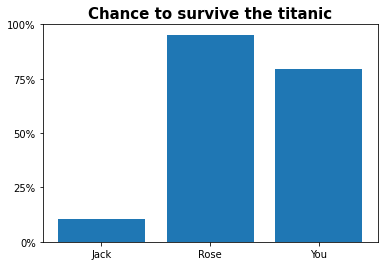

In [167]:
# plot
x = range(len(sample_passengers))
y = probabilities[:,1]
plt.bar(
    x, 
    y * 100
)
plt.xticks(np.arange(3), ('Jack', 'Rose', 'You'))
plt.yticks(np.arange(0, 101, 25), ('0%', '25%', '50%', '75%', '100%'))
plt.title('Chance to survive the titanic', weight='bold', fontsize=15)